This file contains the main analysis for our homework

We want to use the financial ratios to predict credit ratings

In [14]:
import pandas as pd

ratiosAndCreditRatingsFileName = "ratios_with_credit_ratings_sp500.csv"
creditRatingsToSpreadsFileName = "credit_ratings_to_spreads.csv"

ratiosAndCreditRatings = pd.read_csv(ratiosAndCreditRatingsFileName).drop(columns=["Unnamed: 0"])
creditRatingsToSpreads = pd.read_csv(creditRatingsToSpreadsFileName)

# count nan values in each column
print(ratiosAndCreditRatings.isna().sum())
display(ratiosAndCreditRatings.head())
display(creditRatingsToSpreads)

public_date                 0
ticker                      0
roa                         1
intcov_ratio               23
quick_ratio                53
intcov                     23
bm                         14
npm                         0
debt_assets                 0
debt_ebitda                 1
inv_turn                   56
cash_ratio                 53
long_term_credit_rating     0
dtype: int64


,public_date,ticker,roa,intcov_ratio,quick_ratio,intcov,bm,npm,debt_assets,debt_ebitda,inv_turn,cash_ratio,long_term_credit_rating
0,2017-02-28,ABT,0.105949,17.004695,3.654955,5.990610,0.369329,0.050976,0.606634,4.423317,3.222730,2.819069,BBB
1,2017-02-28,PNW,0.086478,4.160918,0.417366,3.148717,0.916132,0.126343,0.691587,3.222494,7.668622,0.006869,A-
2,2017-02-28,AAL,0.157149,5.798263,0.665369,3.583012,0.160266,0.066600,0.926181,3.107877,26.259581,0.504397,BB-
3,2017-02-28,AMD,-0.018351,-0.833333,1.321694,-2.185897,0.040272,-0.116339,0.874737,-24.322034,4.006998,0.939079,CCC+
4,2017-02-28,APD,0.140038,10.662610,0.849159,8.235970,0.250545,0.142316,0.577241,2.274587,6.610056,0.217685,A


,Rating,Spread
0,AAA,3.03
1,AA,2.68
2,A,3.02
3,BBB,3.66
4,BB,4.47
5,B,5.60
6,CCC,9.83


### Class binning
We form three groups:<br>
All A rated : 1<br>
All BBB+, BBB, BBB- rated : 2<br>
Everything else : 3<br>


<AxesSubplot:>

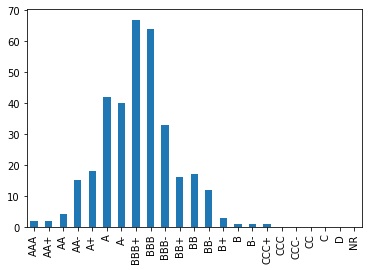

In [6]:
# Plot distribution of credit ratings
ratiosAndCreditRatings["long_term_credit_rating"].value_counts().reindex(["AAA", "AA+", "AA", "AA-", "A+", "A", "A-", "BBB+", "BBB", "BBB-", "BB+", "BB", "BB-", "B+", "B", "B-", "CCC+", "CCC", "CCC-", "CC", "C", "D", "NR"]).plot(kind="bar")

<AxesSubplot:>

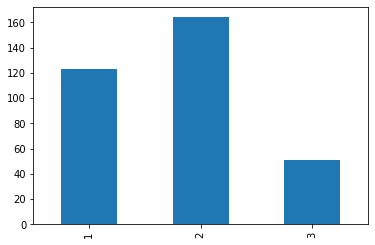

In [10]:
# Put all A ratings in class 1, all BBB in class 2, and everything else in class 3
ratiosAndCreditRatings["credit_rating_class"] = ratiosAndCreditRatings["long_term_credit_rating"].apply(lambda x: 1 if x[0] == "A" else (2 if x[0:3] == "BBB" else 3))

# Plot distribution of credit rating classes
ratiosAndCreditRatings["credit_rating_class"].value_counts().sort_index().plot(kind="bar")

### Feature selection

In [11]:
# feature list
features = ['roa', 'intcov_ratio', 'quick_ratio', 'intcov', 'bm', 'npm', 'debt_assets', 'debt_ebitda', 'inv_turn', 'cash_ratio']

In [12]:
# Use ridge regression to predict credit rating class
from sklearn.linear_model import Ridge

# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ratiosAndCreditRatings[features], ratiosAndCreditRatings["credit_rating_class"], test_size=0.2, random_state=42)

# Fit ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict credit rating class
y_pred = ridge.predict(X_test)

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values